<a href="https://colab.research.google.com/github/zshujon/keras/blob/master/02.convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
ls '/content/drive/MyDrive/datasets/dog_vs_cat/'

images/  models/  sample/  test1/


In [41]:
dir = 'drive/MyDrive/datasets/dog_vs_cat/images/'

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random

import glob
import os
import itertools
import shutil

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

In [43]:
_gpu = tf.config.experimental.list_physical_devices('GPU')
print(f'Number of GPU: {_gpu}')
if _gpu:
    tf.config.experimental.set_memory_growth(_gpu[0], True)

Number of GPU: []


In [44]:
os.chdir(dir)

In [46]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')

    for img in random.sample(glob.glob('cat*'), 500):
        shutil.move(img, 'train/cat')      
    for img in random.sample(glob.glob('dog*'), 500):
        shutil.move(img, 'train/dog')
    for img in random.sample(glob.glob('cat*'), 100):
        shutil.move(img, 'valid/cat')        
    for img in random.sample(glob.glob('dog*'), 100):
        shutil.move(img, 'valid/dog')

os.chdir('../../')

In [55]:
train_path = '/content/drive/MyDrive/datasets/dog_vs_cat/images/train'
valid_path = '/content/drive/MyDrive/datasets/dog_vs_cat/images/valid'

In [56]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [57]:
imgs, labels = next(train_batches)

In [58]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

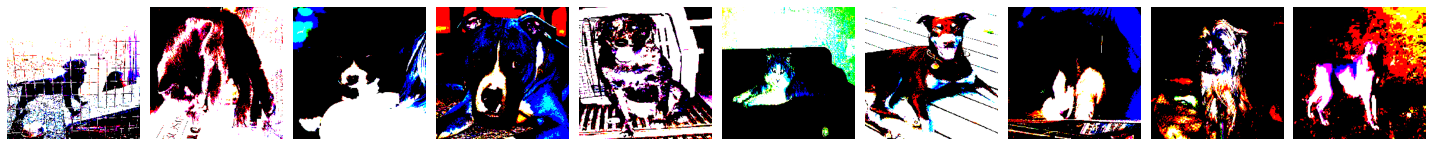

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [59]:
plotImages(imgs)
print(labels)

In [60]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [61]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 69s - loss: 21.6686 - accuracy: 0.5520 - val_loss: 6.9503 - val_accuracy: 0.6200
Epoch 2/10
100/100 - 67s - loss: 2.3704 - accuracy: 0.7550 - val_loss: 4.2688 - val_accuracy: 0.5750
Epoch 3/10
100/100 - 67s - loss: 0.5154 - accuracy: 0.8910 - val_loss: 2.3451 - val_accuracy: 0.6750
Epoch 4/10
100/100 - 67s - loss: 0.0811 - accuracy: 0.9700 - val_loss: 2.4467 - val_accuracy: 0.6400
Epoch 5/10
100/100 - 68s - loss: 0.0774 - accuracy: 0.9750 - val_loss: 2.4614 - val_accuracy: 0.6400
Epoch 6/10
100/100 - 67s - loss: 0.0105 - accuracy: 0.9940 - val_loss: 2.3502 - val_accuracy: 0.6350
Epoch 7/10
100/100 - 67s - loss: 7.8518e-04 - accuracy: 1.0000 - val_loss: 2.3078 - val_accuracy: 0.6600
Epoch 8/10
100/100 - 67s - loss: 5.1515e-04 - accuracy: 1.0000 - val_loss: 2.2906 - val_accuracy: 0.6600
Epoch 9/10
100/100 - 67s - loss: 4.0777e-04 - accuracy: 1.0000 - val_loss: 2.2908 - val_accuracy: 0.6600
Epoch 10/10
100/100 - 67s - loss: 3.5740e-04 - accuracy: 1.0000 - val_loss: 2.